# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [5]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [6]:
# check the data shape
dataframe.shape

(86, 2)

In [7]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [8]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [9]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [12]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [25]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [15]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [17]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

## Prediction model to predict the expected watch time for the next two months

In [22]:
# Make a copy of the dataset
df = dataframe.copy()

# Reset index for modeling
df = df.reset_index()

# Convert date to ordinal (numeric format for regression)
df['date_ordinal'] = pd.to_datetime(df['date_']).map(pd.Timestamp.toordinal)

df.head()

,date_,Total_watch_time_in_houres,date_ordinal
0,2018-01-01,1123.551944,736695
1,2018-01-02,1000.129722,736696
2,2018-01-03,881.924444,736697
3,2018-01-04,782.669444,736698
4,2018-01-05,1051.939444,736699


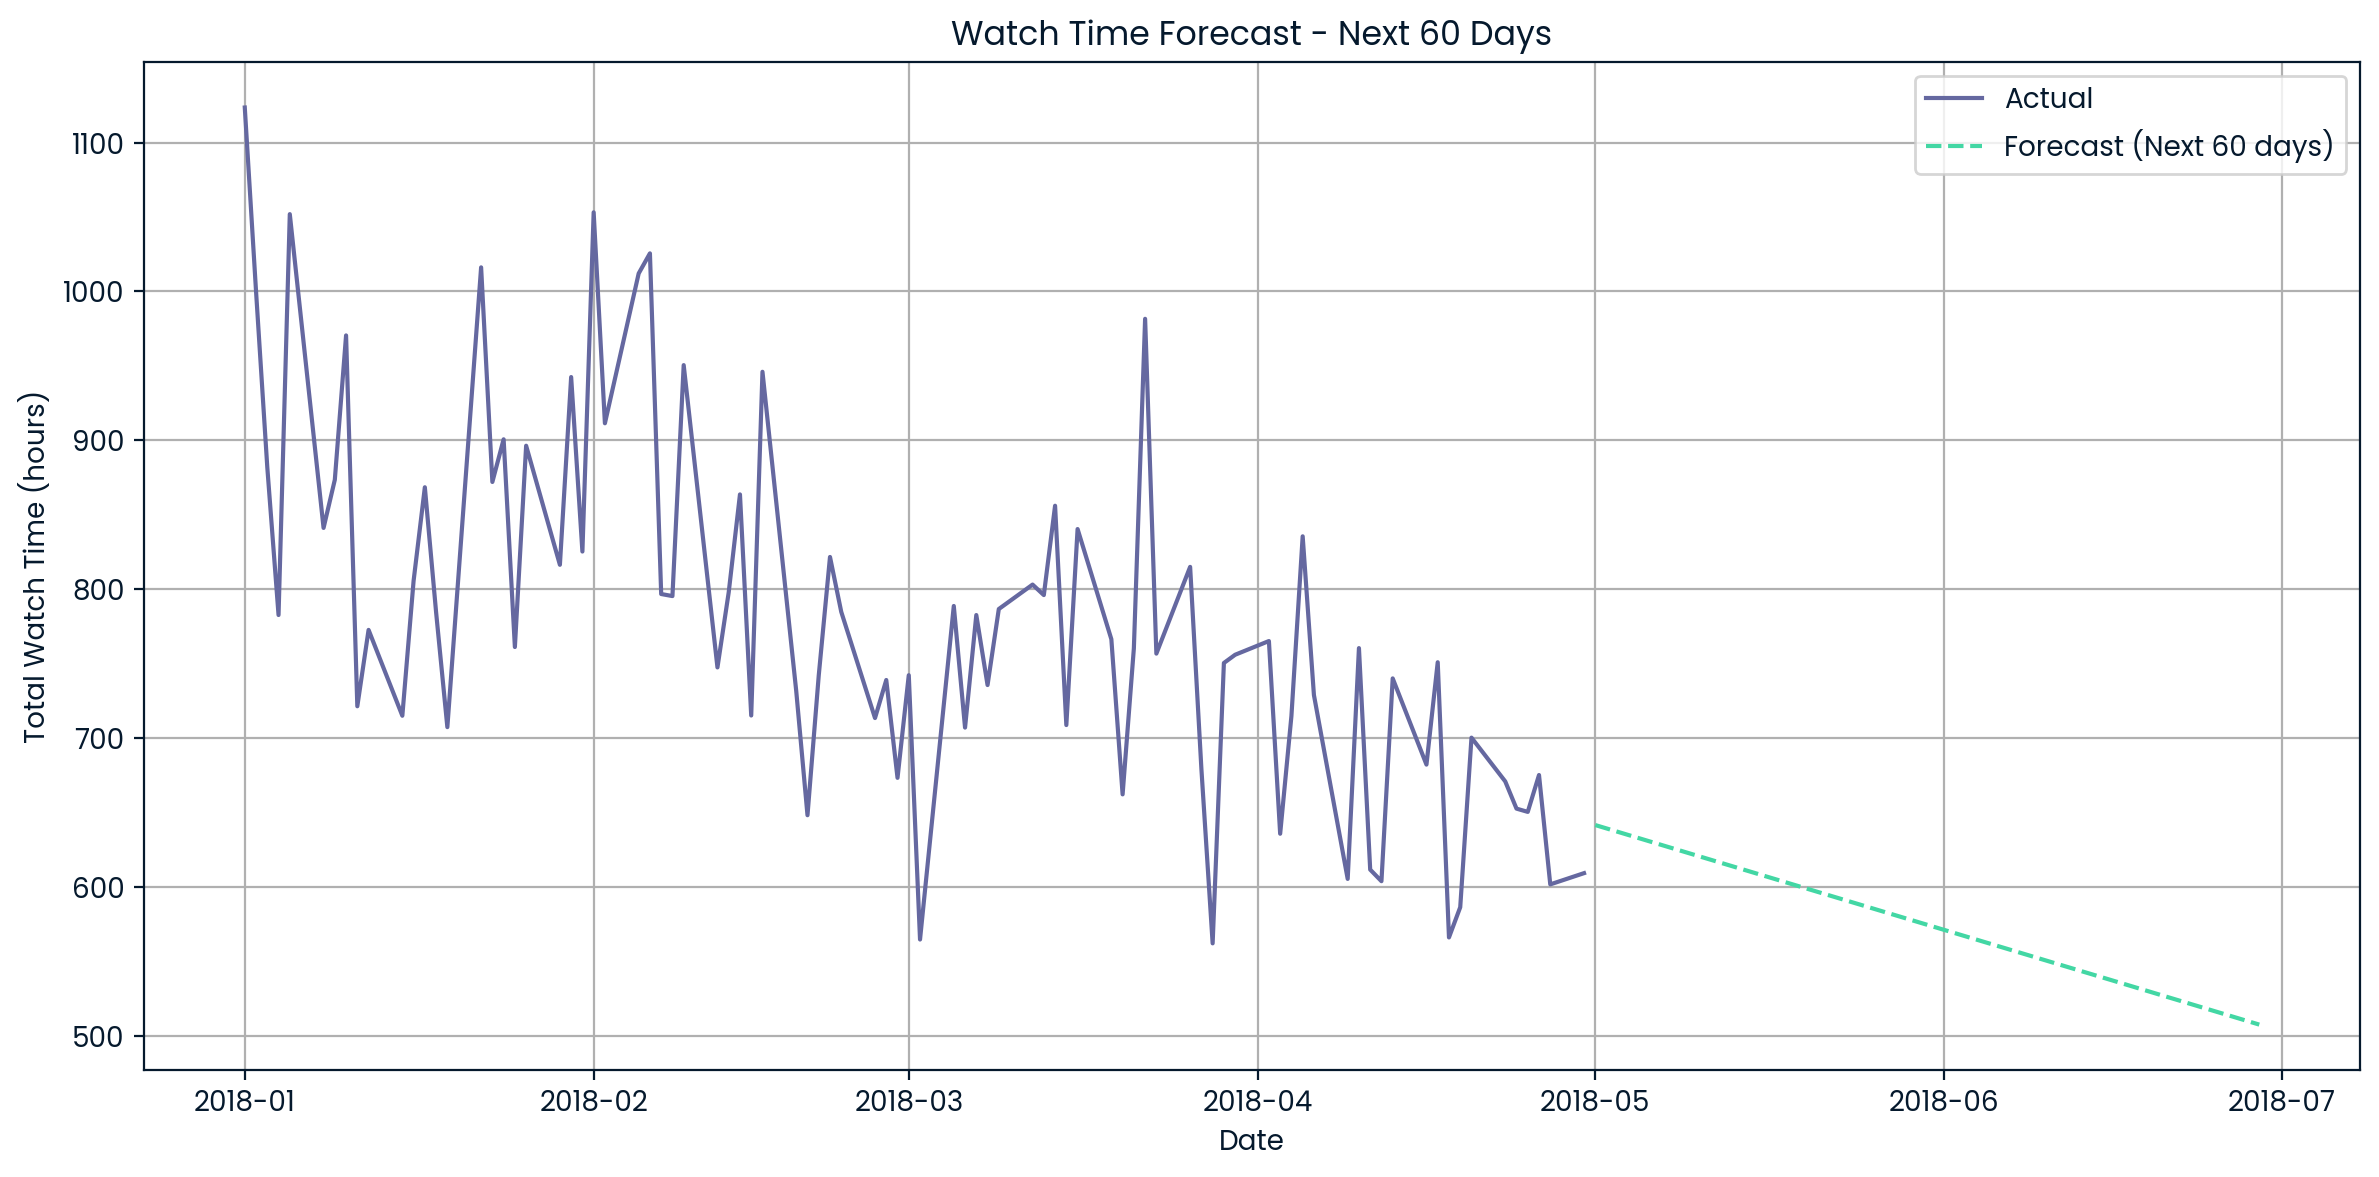

In [28]:
# Fit a simple linear regression
from sklearn.linear_model import LinearRegression

X = df[['date_ordinal']]
y = df['Total_watch_time_in_houres']

model = LinearRegression()
model.fit(X, y)

# Forecast next 60 days
future_dates = pd.date_range(start=df['date_'].max() + pd.Timedelta(days=1), periods=60)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predict future values
future_preds = model.predict(future_ordinals)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'date_': future_dates,
    'Predicted_watch_time_in_houres': future_preds
})

forecast_df.head()


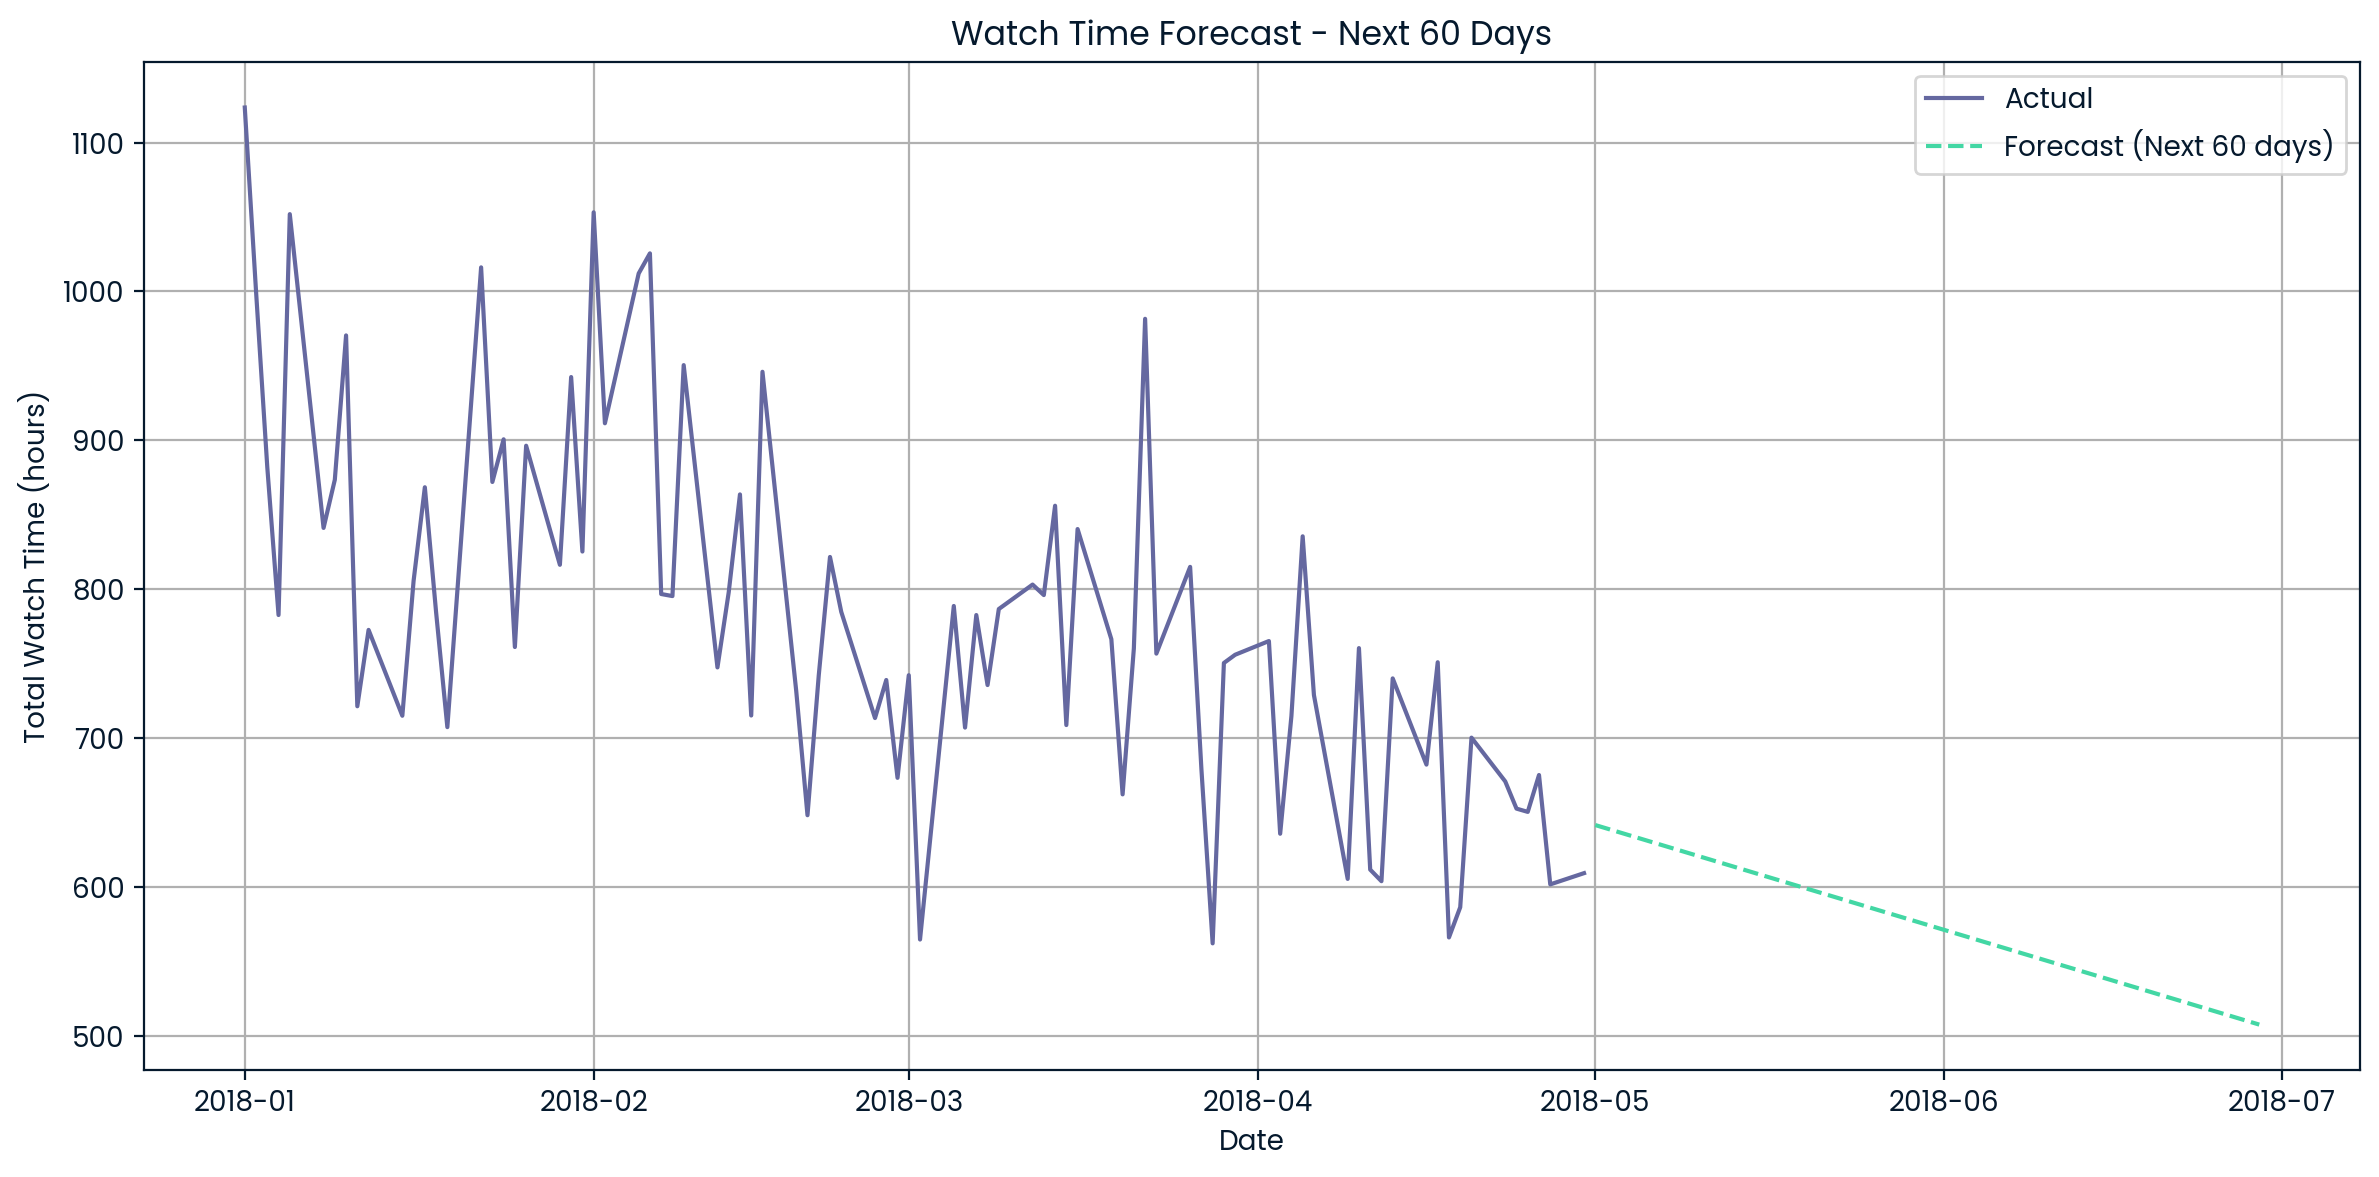

In [29]:
# Plot actual + forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date_'], df['Total_watch_time_in_houres'], label='Actual')
plt.plot(forecast_df['date_'], forecast_df['Predicted_watch_time_in_houres'], label='Forecast (Next 60 days)', linestyle='--')
plt.title('Watch Time Forecast - Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The model indicates a gradual downward trend in user engagement, with expected total watch time decreasing steadily through the forecast window. This could signal seasonal drops or long-term behavioral changes.